In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pyproj
import datetime
import folium
from folium import plugins
import random

In [100]:
file = "parking-citations.csv"
n = sum(1 for line in open(file)) - 1 #number of records in file (excludes header)
s = 1000000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
parkingdf = pd.read_csv(file, skiprows=skip)

In [101]:
parkingdf = parkingdf.drop(labels=['Meter Id','Ticket number','Marked Time','Plate Expiry Date','VIN','Route','Agency','Violation code'],axis=1)
parkingdf = parkingdf.replace(to_replace='nan',value=np.nan)
parkingdf = parkingdf.dropna()

In [40]:
datetimelist = []
for item in parkingdf['Issue Date']:
    d1 = datetime.datetime.strptime(str(item),"%Y-%m-%dT%H:%M:%S")
    datetimelist.append(d1)
parkingdf['Date'] = datetimelist

In [102]:
parkingdfheat = parkingdf.replace(to_replace=99999.0,value=np.nan)
parkingdfheat = parkingdfheat.dropna()

In [103]:
pm = '+proj=lcc +lat_1=34.03333333333333 +lat_2=35.46666666666667 +lat_0=33.5 +lon_0=-118 +x_0=2000000 +y_0=500000.0000000002 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs'
x1m,y1m = parkingdfheat['Latitude'].values, parkingdfheat['Longitude'].values
x2m,y2m = pyproj.transform(pyproj.Proj(pm,preserve_units = True), pyproj.Proj("+init=epsg:4326"), x1m,y1m)
parkingdfheat['Latitude']=x2m
parkingdfheat['Longitude']=y2m
parkingdfheat = parkingdfheat.rename(columns={'Latitude':'Longitude','Longitude':'Latitude'})

m = folium.Map([34.0522, -118.2437], zoom_start=11)
citationArr = parkingdfheat[['Latitude', 'Longitude']].as_matrix()
plugins.HeatMap(citationArr, radius=15,max_val=1000).add_to(m)
m.save("test.html")

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [104]:
parkingdfheat

,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Violation Description,Fine amount,Longitude,Latitude
5,2015-12-26T00:00:00,2240.0,CA,TOYO,PA,GY,3787 MARATHON,PK IN PROH AREA,68.0,-118.283488,34.083877
6,2015-12-26T00:00:00,2231.0,CA,SCIO,SU,BK,1141 EAGLE VISTA DR,PK IN PROH AREA,68.0,-118.189063,34.143404
10,2015-12-23T00:00:00,1145.0,CA,TOYO,PA,SI,500 WORLD WAY,WHITE CURB,58.0,-118.401591,33.945217
11,2015-12-21T00:00:00,18.0,CA,NISS,PA,WH,200 WORLD WAY,WHITE CURB,58.0,-118.401164,33.945217
13,2015-12-23T00:00:00,1248.0,CA,TOYO,PA,GY,200 WORLD WAY,WHITE CURB,58.0,-118.401164,33.945217
14,2015-12-26T00:00:00,830.0,CA,INFI,PA,GY,101 WORLD WAY,NO EVIDENCE OF REG,50.0,-118.402021,33.945217
15,2015-12-24T00:00:00,255.0,CA,HOND,SU,BK,6221 W 96TH ST 50B,NO EVIDENCE OF REG,50.0,-118.394383,33.948842
16,2015-12-16T00:00:00,2300.0,CA,TOYO,TR,SI,200 WORLD WAY,WHITE CURB,58.0,-118.401164,33.945217
17,2015-12-26T00:00:00,2310.0,CA,HOND,PA,GY,301 WORLD WAY 4E,NO EVIDENCE OF REG,50.0,-118.407867,33.944388
18,2015-12-15T00:00:00,1815.0,MO,HOND,PA,SI,380 WORLD WAY,WHITE CURB,58.0,-118.401420,33.945217


Issue Date                       object
Issue time                      float64
RP State Plate                   object
Make                             object
Body Style                       object
Color                            object
Location                         object
Violation Description            object
Fine amount                     float64
Longitude                       float64
Latitude                        float64
Date                     datetime64[ns]
Zip Code                          int32
dtype: object

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

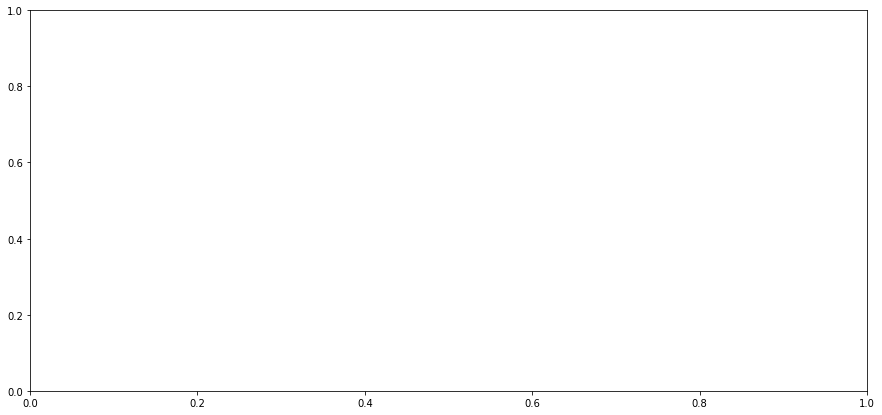